# 準備

In [1]:
from urllib import request 
import pandas as pd
import numpy as np
import logging
import random
from gensim import corpora, models
from tqdm import tqdm
import matplotlib
import matplotlib.pylab as plt
import re

# データ読み込み

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/Q-LDA')
# print(os.getcwd())

In [40]:
# ls

In [2]:
df_nonna = pd.read_csv('2019_content.csv')

In [3]:
df_nonna[:1]

,Unnamed: 0,Unnamed: 0.1,id,article_id,title,created_at,likes_count,tags_str,url,sharing,text
0,0,0,32468,67eb69f006adbbf9c525,Python3.7 + Pipenv環境をUbuntu18.04 LTSに構築,2018-12-31 00:05:08,55,"Ubuntu,Python3,Pipenv",https://qiita.com/sabaku20XX/items/67eb69f006a...,"Ubuntu, TS, python, pipenv, 環境, 構築, する, いく, 記録...",text Ubuntu18.04 LTS上にPython3.7 + Pip...


In [9]:
share_list = []
for sh in df_nonna["sharing"]:
#     print(share)
    if type(sh) is str:
        share_list.append(sh.split(", "))
    else:
        share_list.append([])

len(share_list)

86748

In [0]:
# 辞書読み込む
# if(os.path.exists("dictionary/dictionary.txt")):
#   d = Dictionary.load_from_text("dictionary/dictionary.txt")
# else:
#   print("no dictionary")

In [0]:
# #コーパス読み込む
# if(os.path.exists("corpus/corpus.pkl")):
#   corpus = pickle.dump(corpus,f)
# else:
#   print("no corpus")

In [4]:
# corpus = corpora.MmCorpus("cop.mm")
# lda = models.ldamodel.LdaModel.load("lda.model")
d = corpora.Dictionary.load_from_text("dict.txt")
# doc_index = similarities.docsim.MatrixSimilarity.load("sim")

# 前処理

## 辞書

In [7]:
d = corpora.Dictionary(share_list)

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(81176 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #20000 to Dictionary(123170 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #30000 to Dictionary(157918 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #40000 to Dictionary(193573 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #50000 to Dictionary(223923 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #60000 to Dictionary(250955 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #70000 to Dictionary(279833 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
adding document #80000 to Dictionary(305587 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...)
built Dictionary(320630 unique tokens: ['GET', 'OS', 'TS', 'Ubuntu', 'ltscpu']...) from 86748 documents (total 20282774 cor

In [5]:
print ('num_docs:', d.num_docs) #文档数目
print ('num_pos:', d.num_pos ) #所有词的个数（不去重）
#print ('dfs:', dict.dfs) #字典词频，{单词id，在多少文档中出现}

num_docs: 83842
num_pos: 0


## 不要な単語を除去

In [6]:
d.filter_extremes(no_below=5, no_above=0.2)
d.compactify() # idを振り直してコンパクトにする。

In [7]:
d_num = len(d)
d_num

52106

## コーパスを作る

In [10]:
corpus = [d.doc2bow(w) for w in share_list]
test_size = int(len(corpus) * 0.1)
test_corpus = corpus[:test_size]
train_corpus= corpus[test_size:]
print("test size: ", len(test_corpus))
print("train size: ", len(train_corpus))

test size:  8674
train size:  78074


In [11]:
i = df_nonna["text"]
len(i)

86748

In [0]:
## テキスト
texts = [] 

for i in df_nonna["text"]:
    pat = re.compile('text' + '(.*?)' + '\ncode-frame', re.S)
    t = pat.findall(i)
    t = t[0].replace(' ', '')
    texts.append(t)
len(texts)

86748

# パラメータ調整

In [0]:
coherence_vals = []
perplexity_vals = []

In [0]:
#Metrics for Topic Models
# logging.basicConfig(format='%(message)s', level=logging.INFO)

start = 600
limit = 1000
step = 100

for n_topic in tqdm(range(start, limit, step), ncols=10):
  lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=d, num_topics=n_topic, random_state=0, passes=1)
  perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus)))
  coherence_model_lda = models.CoherenceModel(model=lda_model, corpus=corpus, dictionary=d, coherence='u_mass')
  coherence_vals.append(coherence_model_lda.get_coherence())
  print(coherence_vals) 
  print(perplexity_vals)

In [23]:
# ８時間以上実行した結果が以下になる

# x = range(50,500,50)
c1 = [-2.800185011864889, -3.8381375153485227, -4.337719732484978, -4.824468367839788, -5.5112041769632425, -5.717961684555838, -6.108669880787464, -6.243291521453136, -6.670956831398648]
p1 = [278.08187614749374, 13742.999227407856, 100710.87503672925, 730380.1219802126, 5384586.332505015, 39816241.496140465, 292402825.9846827, 2183130514.0365868, 116344670653.4084]

# x = range(10,150,10)
c2 = [-1.8188228856586268, -2.2717650299753367, -2.395437852142874, -2.576531016152719, -2.800185011864889, -3.2658584650991864, -3.781004662528949, -3.557699334279256, -3.647092421753267, -3.8381375153485227, -3.7737831662103547, -4.293448341597792, -4.081620912557941, -4.311702281672783]
p2 = [305.47796055144323, 287.2191028457021, 281.6994475814561, 280.3771900739065, 278.08187614749374, 277.16850271068944, 281.5075068005926, 2751.5285916214834, 9230.59925911488, 13742.999227407856, 20281.61428271216, 30175.833676662027, 45091.91580265207, 67072.07019771497]

In [14]:
coherence_vals = c1 
perplexity_vals = p1 
print(len(coherence_vals)) 
print(len(perplexity_vals))

9
9


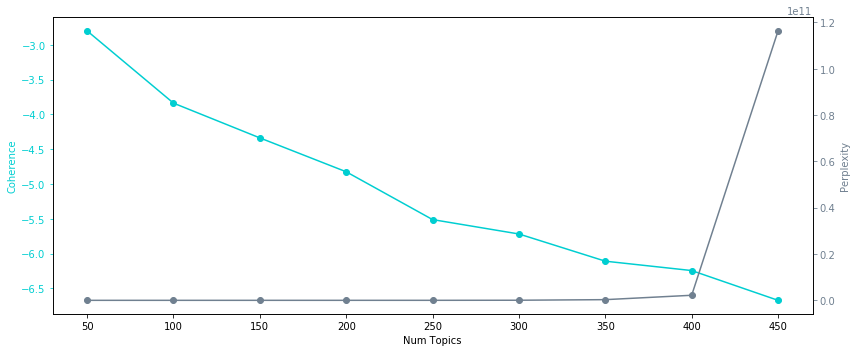

<Figure size 432x288 with 0 Axes>

In [57]:
# evaluation
x = range(50,500,50)

fig, ax1 = plt.subplots(figsize=(12,5))
# # coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
ax1.set_xticks(x)
fig.tight_layout()
plt.show()

# save as png
plt.savefig('metrics1.png') 

In [24]:
coherence_vals = c2[:7]
perplexity_vals = p2[:7]
print(len(coherence_vals)) 
print(len(perplexity_vals))

7
7


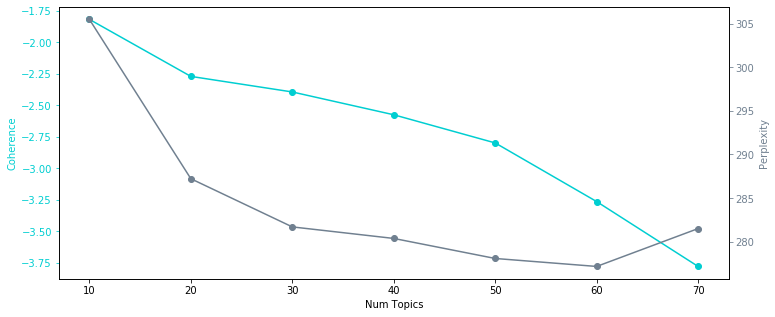

In [25]:
# evaluation
x = range(10,80,10)

fig, ax1 = plt.subplots(figsize=(12,5))
# # coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
# ax1.set_xticks(x)
# fig.tight_layout()
plt.show()

# # save as png
# plt.savefig('metrics2.png') 

# LDAの学習

## 学習

In [12]:
logging.basicConfig(format='%(message)s', level=logging.INFO)

num_topics = 60

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=d, num_topics=num_topics, passes=3)

using symmetric alpha at 0.016666666666666666
using symmetric eta at 0.016666666666666666
using serial LDA version on this node
running online (multi-pass) LDA training, 60 topics, 3 passes over the supplied corpus of 86748 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
PROGRESS: pass 0, at document #2000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #19 (0.017): 0.005*"ブランチ" + 0.005*"言語" + 0.005*"python" + 0.004*"機能" + 0.004*"アクセス" + 0.004*"バージョン" + 0.004*"開発" + 0.003*"選択" + 0.003*"実装" + 0.003*"プロジェクト"
topic #32 (0.017): 0.006*"データ" + 0.005*"ボタン" + 0.005*"選択" + 0.004*"取得" + 0.004*"起動" + 0.004*"テスト" + 0.004*"定義" + 0.003*"画面" + 0.003*"クリック" + 0.003*"機能"
topic #27 (0.017): 0.015*"データ" + 0.004*"コマンド" + 0.004*"python" + 0.004*"参加" + 0.004*"関数" + 0.003*"メソッド" + 0.003*"実装" + 0.003*"接続" + 0.003*"考える" + 0.003*"取得"
topic #17 (0.017): 0.010*"データ" + 0.005*"出力

topic #1 (0.017): 0.031*"関数" + 0.030*"型" + 0.022*"値" + 0.020*"変数" + 0.017*"定義" + 0.014*"実装" + 0.009*"メソッド" + 0.009*"条件" + 0.009*"返す" + 0.009*"宣言"
topic #37 (0.017): 0.027*"vagrant" + 0.024*"仮想" + 0.022*"map" + 0.020*"移行" + 0.015*"box" + 0.014*"DOM" + 0.013*"Re・Act" + 0.010*"vagrantfile" + 0.010*"pyenv" + 0.009*"ディレクティブ"
topic #34 (0.017): 0.030*"AZURE" + 0.021*"SSH" + 0.019*"サーバ" + 0.017*"ドメイン" + 0.015*"接続" + 0.015*"アクセス" + 0.015*"key" + 0.013*"キー" + 0.013*"証明書" + 0.010*"公開鍵"
topic diff=0.697707, rho=0.333333
-11.510 per-word bound, 2915.9 perplexity estimate based on a held-out corpus of 2000 documents with 340515 words
PROGRESS: pass 0, at document #20000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #32 (0.017): 0.034*"選択" + 0.019*"画面" + 0.018*"ボタン" + 0.017*"押す" + 0.015*"入力" + 0.015*"キー" + 0.015*"クリック" + 0.013*"開く" + 0.010*"VIEW" + 0.009*"押下"
topic #39 (0.017): 0.050*"python" + 0.033*"ver" + 0.021*"追記" + 0.016*"プログラム" + 0.015*"文書" + 0.014*"資料" + 0.0

PROGRESS: pass 0, at document #36000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #17 (0.017): 0.063*"ノード" + 0.042*"node" + 0.034*"トランザクション" + 0.012*"音声" + 0.012*"S1" + 0.011*"red" + 0.009*"data" + 0.008*"output" + 0.008*"出力" + 0.008*"データ"
topic #50 (0.017): 0.077*"コマンド" + 0.035*"コンテナ" + 0.034*"起動" + 0.027*"docker" + 0.023*"イメージ" + 0.016*"ディレクトリ" + 0.012*"Linux" + 0.009*"オプション" + 0.009*"ターミナル" + 0.009*"構築"
topic #57 (0.017): 0.028*"lambda" + 0.025*"ジョブ" + 0.024*"テンプレート" + 0.021*"メッセージ" + 0.016*"選択" + 0.015*"Lambda" + 0.013*"関数" + 0.012*"キュー" + 0.011*"FLOW" + 0.010*"クリック"
topic #10 (0.017): 0.036*"パッケージ" + 0.030*"バージョン" + 0.025*"ディレクトリ" + 0.024*"ビルド" + 0.020*"プロジェクト" + 0.018*"ライブラリ" + 0.016*"java" + 0.013*"コマンド" + 0.012*"パス" + 0.010*"導入"
topic #45 (0.017): 0.079*"git" + 0.050*"GitHub" + 0.047*"ブランチ" + 0.046*"リポジトリ" + 0.041*"コミット" + 0.026*"PUSH" + 0.018*"master" + 0.016*"リモート" + 0.016*"マージ" + 0.015*"作業"
topic diff=0.283243, rho=0.235702
PROGRESS: pass 0

topic #3 (0.017): 0.081*"変換" + 0.032*"形式" + 0.019*"日付" + 0.018*"JSON" + 0.015*"フォーマット" + 0.014*"出力" + 0.013*"圧縮" + 0.012*"スタック" + 0.011*"フィルタ" + 0.010*"文字列"
topic #50 (0.017): 0.092*"コマンド" + 0.037*"起動" + 0.029*"コンテナ" + 0.024*"docker" + 0.020*"イメージ" + 0.016*"ディレクトリ" + 0.012*"Linux" + 0.012*"ターミナル" + 0.011*"オプション" + 0.009*"OS"
topic diff=0.157925, rho=0.196116
PROGRESS: pass 0, at document #54000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #51 (0.017): 0.058*"プロセス" + 0.053*"a." + 0.032*"flutter" + 0.027*"AND" + 0.021*"H." + 0.020*"parameter" + 0.018*"命令" + 0.018*"widget" + 0.013*"セクション" + 0.010*"process"
topic #32 (0.017): 0.050*"選択" + 0.041*"画面" + 0.036*"入力" + 0.035*"クリック" + 0.035*"ボタン" + 0.027*"押す" + 0.020*"キー" + 0.019*"開く" + 0.013*"編集" + 0.013*"タブ"
topic #35 (0.017): 0.017*"関数" + 0.017*"theta" + 0.016*"計算" + 0.016*"boldsymbol" + 0.015*"frac" + 0.013*"パラメータ" + 0.013*"分布" + 0.012*"mathbf" + 0.011*"ベクトル" + 0.010*"値"
topic #52 (0.017): 0.011*"エンジニア" + 0

merging changes from 2000 documents into a model of 86748 documents
topic #30 (0.017): 0.019*"サポート" + 0.019*"機能" + 0.016*"対応" + 0.012*"提供" + 0.011*"サービス" + 0.010*"可能" + 0.010*"リリース" + 0.010*"無料" + 0.009*"CROWD" + 0.008*"Edge"
topic #47 (0.017): 0.042*"文字" + 0.027*"要素" + 0.024*"セル" + 0.022*"色" + 0.020*"エクセル" + 0.018*"PT" + 0.017*"位置" + 0.016*"テキスト" + 0.016*"text" + 0.016*"幅"
topic #39 (0.017): 0.090*"いいね" + 0.085*"プログラム" + 0.030*"文書" + 0.027*"ver" + 0.019*"解析" + 0.018*"資料" + 0.014*"履歴" + 0.014*"python" + 0.013*"document" + 0.013*"selenium"
topic #27 (0.017): 0.033*"商品" + 0.028*"署名" + 0.024*"暗号" + 0.023*"バイト" + 0.020*"暗号化" + 0.020*"鍵" + 0.018*"方式" + 0.016*"生成" + 0.013*"データ" + 0.013*"ハッシュ"
topic #45 (0.017): 0.075*"git" + 0.063*"GitHub" + 0.052*"ブランチ" + 0.049*"リポジトリ" + 0.049*"コミット" + 0.024*"PUSH" + 0.021*"master" + 0.018*"Clone" + 0.017*"マージ" + 0.016*"コマンド"
topic diff=0.088487, rho=0.169031
PROGRESS: pass 0, at document #72000/86748
merging changes from 2000 documents into a model of 8674

topic #53 (0.017): 0.017*"チーム" + 0.010*"作業" + 0.010*"メンバー" + 0.010*"課題" + 0.010*"プロダクト" + 0.009*"考える" + 0.008*"レビュー" + 0.007*"組織" + 0.007*"プロジェクト" + 0.006*"開発"
topic #5 (0.017): 0.041*"ユーザー" + 0.039*"登録" + 0.035*"情報" + 0.023*"ユーザ" + 0.021*"サービス" + 0.018*"アカウント" + 0.018*"取得" + 0.017*"管理" + 0.016*"機能" + 0.016*"id"
topic diff=0.064472, rho=0.152499
-11.496 per-word bound, 2889.1 perplexity estimate based on a held-out corpus of 748 documents with 129006 words
PROGRESS: pass 0, at document #86748/86748
merging changes from 748 documents into a model of 86748 documents
topic #39 (0.017): 0.139*"プログラム" + 0.046*"いいね" + 0.030*"解析" + 0.028*"文書" + 0.025*"selenium" + 0.021*"ver" + 0.018*"資料" + 0.018*"辞書" + 0.014*"記録" + 0.014*"document"
topic #27 (0.017): 0.037*"暗号" + 0.029*"暗号化" + 0.025*"バイト" + 0.024*"署名" + 0.024*"商品" + 0.024*"株式会社" + 0.023*"方式" + 0.023*"鍵" + 0.019*"ハッシュ" + 0.017*"ハッシュ値"
topic #57 (0.017): 0.041*"タスク" + 0.040*"メッセージ" + 0.033*"テンプレート" + 0.028*"lambda" + 0.023*"通知" + 0.018*"ジョブ" + 

topic #0 (0.017): 0.062*"C++" + 0.062*"コンパイル" + 0.044*"spring" + 0.042*"java" + 0.027*"main" + 0.026*"BOOT" + 0.024*"oci" + 0.023*"コンパイラ" + 0.020*"OPEN" + 0.015*"SWAGGER"
topic #56 (0.017): 0.065*"接続" + 0.042*"サーバー" + 0.040*"ネットワーク" + 0.030*"ポート" + 0.027*"IP" + 0.026*"IPアドレス" + 0.023*"通信" + 0.015*"アドレス" + 0.013*"ストリーム" + 0.013*"ホスト"
topic #52 (0.017): 0.014*"投稿" + 0.013*"エンジニア" + 0.011*"Twitter" + 0.009*"Qiita" + 0.007*"公開" + 0.006*"参加" + 0.006*"くれる" + 0.006*"いただく" + 0.006*"会社" + 0.006*"プログラミング"
topic #11 (0.017): 0.055*"()" + 0.052*"引数" + 0.048*"文字列" + 0.031*"値" + 0.029*"返す" + 0.026*"メソッド" + 0.023*"渡す" + 0.018*"関数" + 0.018*"取得" + 0.017*"TRUE"
topic #39 (0.017): 0.108*"プログラム" + 0.040*"ver" + 0.028*"解析" + 0.026*"文書" + 0.024*"いいね" + 0.021*"資料" + 0.021*"追記" + 0.013*"document" + 0.013*"履歴" + 0.012*"よい"
topic diff=0.048420, rho=0.148456
PROGRESS: pass 1, at document #18000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #27 (0.017): 0.033*"暗号" + 0.026*"署名" + 

topic #49 (0.017): 0.023*"いい" + 0.023*"ん" + 0.015*"言う" + 0.012*"くれる" + 0.012*"いう" + 0.010*"分かる" + 0.010*"しれる" + 0.010*"動く" + 0.009*"読む" + 0.009*"調べる"
topic #10 (0.017): 0.040*"パッケージ" + 0.032*"バージョン" + 0.030*"ビルド" + 0.028*"ディレクトリ" + 0.026*"プロジェクト" + 0.020*"ライブラリ" + 0.015*"パス" + 0.015*"プラグイン" + 0.013*"生成" + 0.011*"導入"
topic diff=0.047774, rho=0.148456
PROGRESS: pass 1, at document #34000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #6 (0.017): 0.217*"テスト" + 0.033*"test" + 0.033*"SLACK" + 0.021*"CI" + 0.016*"チェック" + 0.015*"自動" + 0.013*"対象" + 0.010*"検証" + 0.009*"修正" + 0.009*"失敗"
topic #59 (0.017): 0.029*"例外" + 0.027*"非同期" + 0.024*"THREAD" + 0.022*"Kotlin" + 0.020*"terraform" + 0.017*"同期" + 0.015*"発生" + 0.014*"終了" + 0.012*"promise" + 0.012*"コールバック"
topic #4 (0.017): 0.058*"モデル" + 0.048*"学習" + 0.017*"データ" + 0.016*"予測" + 0.016*"機械学習" + 0.014*"分類" + 0.013*"精度" + 0.013*"GPU" + 0.011*"特徴" + 0.011*"TensorFlow"
topic #46 (0.017): 0.019*"システム" + 0.012*"設計" + 0.009

topic #58 (0.017): 0.062*"TO" + 0.052*"AND" + 0.035*"IS" + 0.021*"ON" + 0.016*"YOU" + 0.015*"WITH" + 0.013*"BY" + 0.011*"It" + 0.008*"ING" + 0.007*"AN"
topic #11 (0.017): 0.061*"()" + 0.048*"引数" + 0.044*"文字列" + 0.037*"値" + 0.028*"返す" + 0.025*"メソッド" + 0.023*"渡す" + 0.022*"取得" + 0.017*"TRUE" + 0.016*"入力"
topic #30 (0.017): 0.025*"機能" + 0.019*"サポート" + 0.019*"対応" + 0.015*"提供" + 0.014*"可能" + 0.014*"サービス" + 0.011*"CROWD" + 0.011*"無料" + 0.011*"リリース" + 0.008*"ライセンス"
topic #2 (0.017): 0.036*"デバイス" + 0.032*"接続" + 0.027*"USB" + 0.023*"Raspberry Pi" + 0.019*"Arduino" + 0.014*"PC" + 0.014*"電源" + 0.013*"ボード" + 0.012*"tweet" + 0.012*"センサー"
topic #14 (0.017): 0.088*"エラー" + 0.025*"解決" + 0.025*"原因" + 0.024*"発生" + 0.024*"問題" + 0.023*"MySQL" + 0.015*"バージョン" + 0.014*"db" + 0.009*"oracle" + 0.009*"laravel"
topic diff=0.041216, rho=0.148456
PROGRESS: pass 1, at document #52000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #24 (0.017): 0.164*"PHP" + 0.097*"rails" + 0.064*"RUBY

topic #0 (0.017): 0.062*"java" + 0.059*"C++" + 0.057*"コンパイル" + 0.041*"spring" + 0.039*".S" + 0.033*"main" + 0.025*"コンパイラ" + 0.021*"BOOT" + 0.018*"OPEN" + 0.012*"oci"
topic #22 (0.017): 0.075*"動画" + 0.056*"単語" + 0.035*"再生" + 0.026*"音声" + 0.020*"文章" + 0.018*"YouTube" + 0.015*"再構成" + 0.014*"音" + 0.013*"bi" + 0.013*"類似"
topic diff=0.034610, rho=0.148456
PROGRESS: pass 1, at document #68000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #14 (0.017): 0.090*"エラー" + 0.026*"問題" + 0.026*"発生" + 0.025*"解決" + 0.024*"原因" + 0.023*"MySQL" + 0.016*"バージョン" + 0.013*"db" + 0.010*"失敗" + 0.009*"対応"
topic #37 (0.017): 0.094*"仮想" + 0.049*"仮想マシン" + 0.047*"box" + 0.047*"VM" + 0.043*"移行" + 0.042*"ELIXIR" + 0.041*"vagrant" + 0.040*"VirtualBox" + 0.036*"map" + 0.023*"ゲスト"
topic #42 (0.017): 0.068*"テーブル" + 0.039*"データベース" + 0.033*"データ" + 0.031*"id" + 0.030*"db" + 0.030*"SQL" + 0.027*"削除" + 0.023*"レコード" + 0.020*"カラム" + 0.017*"更新"
topic #19 (0.017): 0.096*"開発" + 0.040*"ツール" + 0.036*"言語

merging changes from 2000 documents into a model of 86748 documents
topic #21 (0.017): 0.118*"モジュール" + 0.047*"typescript" + 0.027*"import" + 0.027*"TS" + 0.020*"module" + 0.018*"ピン" + 0.018*"webpack" + 0.017*"V2" + 0.016*"ES" + 0.014*"ST"
topic #57 (0.017): 0.047*"タスク" + 0.046*"メッセージ" + 0.035*"通知" + 0.033*"テンプレート" + 0.025*"lambda" + 0.020*"ジョブ" + 0.016*"トリガー" + 0.013*"フロー" + 0.013*"関数" + 0.013*"カスタム"
topic #40 (0.017): 0.055*"ゲーム" + 0.038*"UNITY" + 0.032*"移動" + 0.023*"フォント" + 0.020*"位置" + 0.017*"シーン" + 0.014*"オブジェクト" + 0.013*"スクリプト" + 0.013*"プレイヤー" + 0.011*"MATLAB"
topic #33 (0.017): 0.202*"出力" + 0.104*"ログ" + 0.033*"log" + 0.028*"標準" + 0.022*"監視" + 0.018*"デバッグ" + 0.015*"レベル" + 0.014*"コンソール" + 0.013*"C#" + 0.009*"情報"
topic #12 (0.017): 0.221*"python" + 0.044*"py" + 0.028*"Django" + 0.028*"ライブラリ" + 0.020*"pip" + 0.013*"anaconda" + 0.013*"OpenCV" + 0.012*"インポート" + 0.011*"仮想" + 0.010*"txt"
topic diff=0.031108, rho=0.148456
PROGRESS: pass 1, at document #86000/86748
merging changes from 200

topic #15 (0.017): 0.018*"評価" + 0.014*"対策" + 0.013*"攻撃" + 0.013*"情報" + 0.011*"価格" + 0.007*"注文" + 0.007*"判断" + 0.007*"期間" + 0.007*"ユニット" + 0.007*"取引"
topic #24 (0.017): 0.164*"PHP" + 0.092*"rails" + 0.063*"RUBY" + 0.057*"laravel" + 0.039*"gem" + 0.025*"RuBy" + 0.022*"composer" + 0.020*"Elasticsearch" + 0.019*"バージョン" + 0.017*"gemfile"
topic diff=0.030043, rho=0.146846
PROGRESS: pass 2, at document #14000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #6 (0.017): 0.255*"テスト" + 0.038*"test" + 0.029*"SLACK" + 0.024*"CI" + 0.016*"自動" + 0.016*"チェック" + 0.015*"検証" + 0.013*"対象" + 0.011*"失敗" + 0.008*"修正"
topic #28 (0.017): 0.081*"AWS" + 0.049*"サービス" + 0.037*"インスタンス" + 0.028*"リソース" + 0.024*"S3" + 0.021*"EC2" + 0.019*"Amazon" + 0.016*"CLOUD" + 0.015*"iam" + 0.014*"ポリシー"
topic #36 (0.017): 0.092*"グループ" + 0.043*"ルール" + 0.038*"ルート" + 0.032*"VPC" + 0.026*"サブネット" + 0.025*"タイプ" + 0.019*"セキュリティ" + 0.019*"Cluster" + 0.017*"インスタンス" + 0.016*"Redis"
topic #50 (0.017): 0.116*"コ

topic #26 (0.017): 0.052*"Kubernetes" + 0.051*"クラスタ" + 0.044*"修正" + 0.032*"pod" + 0.020*"cluster" + 0.016*"access" + 0.015*"削除" + 0.013*"YAML" + 0.013*"コルーチン" + 0.012*"namespace"
topic #9 (0.017): 0.090*"画像" + 0.018*"座標" + 0.013*"描画" + 0.012*"検出" + 0.011*"カメラ" + 0.009*"色" + 0.008*"位置" + 0.008*"サイズ" + 0.008*"回転" + 0.008*"部分"
topic #44 (0.017): 0.230*"データ" + 0.026*"取得" + 0.021*"CSV" + 0.021*"分析" + 0.020*"グラフ" + 0.012*"情報" + 0.010*"抽出" + 0.008*"集計" + 0.008*"data" + 0.006*"可視化"
topic #23 (0.017): 0.056*"文字" + 0.033*"文字列" + 0.014*"コメント" + 0.014*"改行" + 0.012*"数字" + 0.011*"スペース" + 0.011*"正規表現" + 0.010*"意味" + 0.010*"パターン" + 0.009*"書き方"
topic diff=0.026375, rho=0.146846
PROGRESS: pass 2, at document #32000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #59 (0.017): 0.029*"非同期" + 0.029*"例外" + 0.025*"THREAD" + 0.021*"ストリーム" + 0.021*"Kotlin" + 0.020*"同期" + 0.018*"terraform" + 0.017*"終了" + 0.014*"コールバック" + 0.014*"並列"
topic #14 (0.017): 0.095*"エラー" + 0.031*"問題" + 0.0

topic diff=0.023038, rho=0.146846
PROGRESS: pass 2, at document #48000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #12 (0.017): 0.231*"python" + 0.048*"py" + 0.027*"ライブラリ" + 0.025*"Django" + 0.022*"pip" + 0.015*"anaconda" + 0.011*"モジュール" + 0.011*"txt" + 0.011*"インポート" + 0.011*"NumPy"
topic #24 (0.017): 0.162*"PHP" + 0.101*"rails" + 0.068*"laravel" + 0.066*"RUBY" + 0.035*"gem" + 0.027*"RuBy" + 0.018*"Elasticsearch" + 0.018*"composer" + 0.017*"バージョン" + 0.015*"gemfile"
topic #7 (0.017): 0.110*"docker" + 0.087*"コンテナ" + 0.044*"イメージ" + 0.029*"起動" + 0.018*"構築" + 0.017*"compose" + 0.016*"nginx" + 0.013*"dockerfile" + 0.010*"yml" + 0.010*"ホスト"
topic #17 (0.017): 0.083*"ノード" + 0.046*"node" + 0.022*"トランザクション" + 0.019*"Blockchain" + 0.018*"ブロック" + 0.015*"S1" + 0.014*"S2" + 0.012*"red" + 0.009*"E1" + 0.009*"E2"
topic #13 (0.017): 0.120*"クラス" + 0.102*"メソッド" + 0.064*"オブジェクト" + 0.038*"実装" + 0.025*"定義" + 0.025*"インスタンス" + 0.024*"プロパティ" + 0.020*"生成" + 0.015*"継承" + 0.013

topic #33 (0.017): 0.224*"出力" + 0.118*"ログ" + 0.028*"標準" + 0.025*"log" + 0.019*"デバッグ" + 0.016*"監視" + 0.015*"レベル" + 0.011*"情報" + 0.010*"コンソール" + 0.009*"内容"
topic #38 (0.017): 0.059*"コンポーネント" + 0.042*"イベント" + 0.040*"状態" + 0.024*"state" + 0.022*"UI" + 0.022*"実装" + 0.021*"更新" + 0.018*"VIEW" + 0.017*"遷移" + 0.012*"値"
topic #3 (0.017): 0.089*"変換" + 0.045*"形式" + 0.035*"JSON" + 0.024*"日付" + 0.021*"フォーマット" + 0.018*"時刻" + 0.016*"読み込む" + 0.014*"保存" + 0.013*"文字列" + 0.013*"圧縮"
topic diff=0.024169, rho=0.146846
PROGRESS: pass 2, at document #66000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #57 (0.017): 0.046*"メッセージ" + 0.041*"タスク" + 0.036*"通知" + 0.028*"テンプレート" + 0.023*"lambda" + 0.020*"SLACK" + 0.018*"送信" + 0.017*"ジョブ" + 0.016*"トリガー" + 0.013*"カスタム"
topic #31 (0.017): 0.024*"理解" + 0.022*"勉強" + 0.017*"読む" + 0.017*"学習" + 0.016*"知識" + 0.015*"学ぶ" + 0.015*"本" + 0.014*"試験" + 0.014*"問題" + 0.014*"内容"
topic #2 (0.017): 0.040*"デバイス" + 0.030*"接続" + 0.025*"USB" + 0.023*"Raspberr

topic diff=0.023203, rho=0.146846
PROGRESS: pass 2, at document #82000/86748
merging changes from 2000 documents into a model of 86748 documents
topic #6 (0.017): 0.294*"テスト" + 0.041*"test" + 0.025*"CI" + 0.021*"検証" + 0.020*"自動" + 0.014*"チェック" + 0.014*"対象" + 0.011*"モック" + 0.010*"失敗" + 0.010*"RSpec"
topic #2 (0.017): 0.034*"デバイス" + 0.030*"接続" + 0.024*"USB" + 0.021*"Raspberry Pi" + 0.019*"Arduino" + 0.017*"PC" + 0.015*"LED" + 0.015*"制御" + 0.014*"電源" + 0.013*"動作"
topic #39 (0.017): 0.215*"プログラム" + 0.046*"いいね" + 0.045*"解析" + 0.029*"文書" + 0.026*"ver" + 0.015*"資料" + 0.014*"document" + 0.013*"記録" + 0.013*"よい" + 0.010*"形態素解析"
topic #0 (0.017): 0.090*"java" + 0.055*"コンパイル" + 0.049*"C++" + 0.047*".S" + 0.031*"main" + 0.030*"spring" + 0.023*"アノテーション" + 0.022*"XML" + 0.021*"コンパイラ" + 0.018*"BOOT"
topic #52 (0.017): 0.017*"投稿" + 0.014*"Twitter" + 0.013*"エンジニア" + 0.011*"Qiita" + 0.009*"参加" + 0.008*"いただく" + 0.006*"tweet" + 0.006*"会社" + 0.006*"テーマ" + 0.006*"公開"
topic diff=0.023718, rho=0.146846
PROGRES

# 保存

In [13]:
# d.save_as_text("dict.txt")
corpora.MmCorpus.serialize("cop.mm", corpus)
lda.save("lda.model")
doc_index.save("sim")

storing corpus in Matrix Market format to cop.mm
saving sparse matrix to cop.mm
PROGRESS: saving document #0
PROGRESS: saving document #1000
PROGRESS: saving document #2000
PROGRESS: saving document #3000
PROGRESS: saving document #4000
PROGRESS: saving document #5000
PROGRESS: saving document #6000
PROGRESS: saving document #7000
PROGRESS: saving document #8000
PROGRESS: saving document #9000
PROGRESS: saving document #10000
PROGRESS: saving document #11000
PROGRESS: saving document #12000
PROGRESS: saving document #13000
PROGRESS: saving document #14000
PROGRESS: saving document #15000
PROGRESS: saving document #16000
PROGRESS: saving document #17000
PROGRESS: saving document #18000
PROGRESS: saving document #19000
PROGRESS: saving document #20000
PROGRESS: saving document #21000
PROGRESS: saving document #22000
PROGRESS: saving document #23000
PROGRESS: saving document #24000
PROGRESS: saving document #25000
PROGRESS: saving document #26000
PROGRESS: saving document #27000
PROGRESS:

NameError: name 'doc_index' is not defined

# 可視化

In [46]:
all_topics = lda.get_document_topics(corpus, minimum_probability=0)

In [47]:
with open('doc_lda_tensor.tsv','w') as w:
    for doc_topics in all_topics:
        for topics in doc_topics:
            w.write(str(topics[1])+ "\t")
        w.write("\n")

In [55]:
tags_str = df_nonna["tags_str"]

lang_s = []
for lang in tags_str:
    lang_s.append(lang.split(",")[0])
len(lang_s)

86748

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
codelang = le.fit_transform(lang_s)
len(codelang)

86748

In [57]:
with open('doc_lda_metadata.tsv','w',encoding='utf-8-sig') as w:
    w.write('Titles\tGenres\n')    
    for i in range(len(lang_s)):       
        w.write("%s\t%s\n" % (lang_s[i],codelang[i]))

***

***

# 類似度

In [14]:
doc_index = similarities.docsim.MatrixSimilarity(lda[corpus])

scanning corpus to determine the number of features (consider setting `num_features` explicitly)
creating matrix with 86748 documents and 60 features


In [15]:
n =50
target_article = corpus[n]
vec_lda = lda[target_article]

s = doc_index.__getitem__(vec_lda)
s = sorted(enumerate(s), key=lambda t: t[1], reverse=True) 
s[:10]

[(50, 1.0),
 (38333, 0.9704865),
 (35456, 0.96361566),
 (31202, 0.95932865),
 (72475, 0.95014954),
 (22243, 0.9490837),
 (3135, 0.94855785),
 (14657, 0.94699913),
 (51797, 0.94637305),
 (29125, 0.9440673)]

In [16]:
import pandas as pd
df_nonna = pd.read_csv('2019_content.csv')

columns=['記事id','タイトル','記事タグ','URL']
recom = pd.DataFrame(columns=columns)

for doc_id, sim in s[:10]:
    se = pd.Series([df_nonna["article_id"][doc_id],df_nonna['title'][doc_id],df_nonna['tags_str'][doc_id],df_nonna['url'][doc_id]],index=columns)
    recom = recom.append(se, ignore_index=True)
    
recom

,記事id,タイトル,記事タグ,URL
0,4a2413fc2c07aca5d193,GCPで作成したWordpressのSSL対応,"WordPress,SSL,GoogleCloudPlatform",https://qiita.com/Yuya_Nishizaki/items/4a2413f...
1,b7d045710d8319f1a3e4,Sourcetree に SSHで接続する mac,"Mac,SSH,SourceTree",https://qiita.com/YoshiISHIGAMI/items/b7d04571...
2,bc736cc36dc696fbdacc,AWS Route53 DNS設定メモ,"AWS,dns,route53",https://qiita.com/mossann/items/bc736cc36dc696...
3,e057e09325148f455637,BitbucketでSSH接続,"SSH,Bitbucket,初心者",https://qiita.com/shimishimizu/items/e057e0932...
4,07a7c323a044757c9256,サーバーのメール関連設定・Spam対応,"dns,postfix,DKIM,spam,メール",https://qiita.com/kerry/items/07a7c323a044757c...
5,2b502dfb3c624b6ac557,AzureVMにSSH 公開キーを使って接続,"SSH,Azure",https://qiita.com/quzq/items/2b502dfb3c624b6ac557
6,e654953c89aab6f847a4,sshの秘密鍵パスフレーズの確認と変更,"SSH,ssh設定,パスフレーズ",https://qiita.com/shukan0728/items/e654953c89a...
7,7acce5b4398af7f4c358,お名前ドットコムで取得したドメインをNetlifyで使う,"dns,お名前.com,Netlify",https://qiita.com/hitochan777/items/7acce5b439...
8,4f3c2ee6569489ae5fe2,MacOS X クライアントから SSH サーバーへパスワードなしで接続する方法,"MacOSX,SSH,ssh-copy-id,ssh-keygen",https://qiita.com/ousaan/items/4f3c2ee6569489a...
9,769f0def7010c95a2fe4,さくらサーバーでお名前のドメインの使い方（自分用）,さくらサーバーでお名前のドメインの使い方,https://qiita.com/mi_tiwtter/items/769f0def701...
